<a href="https://colab.research.google.com/github/AkulaAnshul/AIML/blob/main/AIML_Module_1_Lab_2_Machine_Learning_terms_and_metrics_%26_Data_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Module 1, Lab 2**
# **Machine Learning terms and metrics & Data Augmentation**

# Section 1 - Machine Learning terms and metrics

In this section, we will show a part of the ML pipeline by using the California Housing dataset. There are 20640 samples, each with 8 attributes like income of the block, age of the houses per district etc. The task is to predict the cost of the houses per district. We will use the scikit-learn library to load the data and perform some basic data preprocessing and model training. We will also show how to evaluate the model using some common metrics, split the data into training and testing sets, and use cross-validation to get a better estimate of the model's performance.

In [66]:
#The codes in the colab were not running I have attached a scrren recording regarding it so I saved the colab to my google drive and completed the lab module .I apologise in advance if I should'nt have done the lab module like this
from google.colab import files
uploaded = files.upload()

Saving Screen Recording 2024-10-26 035247.mp4 to Screen Recording 2024-10-26 035247.mp4


In [67]:
from IPython.display import Video
video_path = 'Screen Recording 2024-10-26 035247.mp4'
Video(video_path)

In [64]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

rng = np.random.default_rng(seed=42)

In [18]:
dataset = datasets.fetch_california_housing()
#dataset1 = datasets.fetch_washington_housing()
# Dataset description
print(dataset.DESCR)
#print(dataset1.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

Given below are the list of target values. These correspond to the house value derived considering all the 8 input features and are continuous values. We should use regression models to predict these values but we will start with a simple classification model for the sake of simplicity. We need to just round off the values to the nearest integer and use a classification model to predict the house value.

In [19]:
print("Orignal target values:", dataset.target)

dataset.target = dataset.target.astype(int)
print("Target values after conversion:", dataset.target)
print("Input variables shape:", dataset.data.shape)
print("Output variables shape:", dataset.target.shape)
print("Input variables:", dataset.feature_names)
print("Output variables:", dataset.target_names)
print("Number of samples:", len(dataset.target))
print("Number of features:", len(dataset.feature_names))
print("Number of classes:", len(dataset.target_names))

Orignal target values: [4.526 3.585 3.521 ... 0.923 0.847 0.894]
Target values after conversion: [4 3 3 ... 0 0 0]
Input variables shape: (20640, 8)
Output variables shape: (20640,)
Input variables: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Output variables: ['MedHouseVal']
Number of samples: 20640
Number of features: 8
Number of classes: 1


The simplest model to use for classification is the K-Nearest Neighbors model. We will use this model to predict the house value with a K value of 1. We will also use the accuracy metric to evaluate the model.

In [20]:
def NN1(traindata, trainlabel, query):
    """
    This function takes in the training data, training labels and a query point
    and returns the predicted label for the query point using the nearest neighbour algorithm

    traindata: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    trainlabel: numpy array of shape (n,) where n is the number of samples
    query: numpy array of shape (d,) where d is the number of features

    returns: the predicted label for the query point which is the label of the training data which is closest to the query point
    """
    diff = (
        traindata - query
    )  # find the difference between features. Numpy automatically takes care of the size here
    sq = diff * diff  # square the differences
    dist = sq.sum(1)  # add up the squares
    label = trainlabel[np.argmin(dist)]
    return label


def NN(traindata, trainlabel, testdata):
    """
    This function takes in the training data, training labels and test data
    and returns the predicted labels for the test data using the nearest neighbour algorithm

    traindata: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    trainlabel: numpy array of shape (n,) where n is the number of samples
    testdata: numpy array of shape (m,d) where m is the number of test samples and d is the number of features

    returns: the predicted labels for the test data which is the label of the training data which is closest to each test point
    """
    predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
    return predlabel

We will also define a 'random classifier', which randomly allots labels to each sample

In [21]:
def RandomClassifier(traindata, trainlabel, testdata):
    """
    This function takes in the training data, training labels and test data
    and returns the predicted labels for the test data using the random classifier algorithm

    In reality, we don't need these arguments but we are passing them to keep the function signature consistent with other classifiers

    traindata: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    trainlabel: numpy array of shape (n,) where n is the number of samples
    testdata: numpy array of shape (m,d) where m is the number of test samples and d is the number of features

    returns: the predicted labels for the test data which is a random label from the training data
    """

    classes = np.unique(trainlabel)
    rints = rng.integers(low=0, high=len(classes), size=len(testdata))
    predlabel = classes[rints]
    return predlabel

We need a metric to evaluate the performance of the model. Let us define a metric 'Accuracy' to see how good our learning algorithm is. Accuracy is the ratio of the number of correctly classified samples to the total number of samples. The higher the accuracy, the better the algorithm. We will use the accuracy metric to evaluate and compate the performance of the K-Nearest Neighbors model and the random classifier.

In [22]:
def Accuracy(gtlabel, predlabel):
    """
    This function takes in the ground-truth labels and predicted labels
    and returns the accuracy of the classifier

    gtlabel: numpy array of shape (n,) where n is the number of samples
    predlabel: numpy array of shape (n,) where n is the number of samples

    returns: the accuracy of the classifier which is the number of correct predictions divided by the total number of predictions
    """
    assert len(gtlabel) == len(
        predlabel
    ), "Length of the ground-truth labels and predicted labels should be the same"
    correct = (
        gtlabel == predlabel
    ).sum()  # count the number of times the groundtruth label is equal to the predicted label.
    return correct / len(gtlabel)

Let us make a function to split the dataset with the desired probability. We will use this function to split the dataset into training and testing sets. We will use the training set to train the model and the testing set to evaluate the model.

In [23]:
def split(data, label, percent):
    # generate a random number for each sample
    rnd = rng.random(len(label))
    split1 = rnd < percent
    split2 = rnd >= percent
    split3 = split1 & split2

    split1data = data[split1, :]
    split1label = label[split1]
    split2data = data[split2, :]
    split2label = label[split2]
    split3data = data[split3, :]
    split3label = label[split3]
    return split1data, split1label, split2data, split2label
    return split3data, split3label

We will reserve 20% of our dataset as the test set. We will not change this portion throughout our experiments

In [24]:
testdata, testlabel, alltraindata, alltrainlabel = split(
    dataset.data, dataset.target, 20 / 100
)
print("Number of test samples:", len(testlabel))
print("Number of train samples:", len(alltrainlabel))
print("Percent of test data:", len(testlabel) * 100 / len(dataset.target), "%")
print("Percent of train data:", len(alltrainlabel) * 100 / len(dataset.target), "%")
#print("Number of features:", len(dataset.feature_names))

Number of test samples: 4144
Number of train samples: 16496
Percent of test data: 20.07751937984496 %
Percent of train data: 79.92248062015504 %


## Experiments with splits

Let us reserve some of our train data as a validation set

In [25]:
traindata, trainlabel, valdata, vallabel = split(
    alltraindata, alltrainlabel, 75 / 100)

What is the accuracy of our classifiers on the train dataset?

In [26]:
trainpred = NN(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Training accuracy using nearest neighbour algorithm:", trainAccuracy*100, "%")

trainpred = RandomClassifier(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Training accuracy using random classifier: ", trainAccuracy*100, "%")

Training accuracy using nearest neighbour algorithm: 100.0 %
Training accuracy using random classifier:  16.4375808538163 %


For nearest neighbour, the train accuracy is always 1. The accuracy of the random classifier is close to 1/(number of classes) which is 0.1666 in our case. This is because the random classifier randomly assigns a label to each sample and the probability of assigning the correct label is 1/(number of classes). Let us predict the labels for our validation set and get the accuracy. This accuracy is a good estimate of the accuracy of our model on unseen data.

In [27]:
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using nearest neighbour algorithm:", valAccuracy*100, "%")


valpred = RandomClassifier(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using random classifier:", valAccuracy*100, "%")

Validation accuracy using nearest neighbour algorithm: 34.10852713178294 %
Validation accuracy using random classifier: 16.884689922480618 %


Validation accuracy of nearest neighbour is considerably less than its train accuracy while the validation accuracy of random classifier is the same. However, the validation accuracy of nearest neighbour is twice that of the random classifier. Now let us try another random split and check the validation accuracy. We will see that the validation accuracy changes with the split. This is because the validation set is small and the accuracy is highly dependent on the samples in the validation set. We can get a better estimate of the accuracy by using cross-validation.

In [28]:
traindata, trainlabel, valdata, vallabel = split(
    alltraindata, alltrainlabel, 75 / 100)
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using nearest neighbour algorithm:", valAccuracy*100, "%")

Validation accuracy using nearest neighbour algorithm: 34.048257372654156 %


You can run the above cell multiple times to try with different random splits.
We notice that the accuracy is different for each run, but close together.

Now let us compare it with the accuracy we get on the test dataset.

In [29]:
testpred = NN(alltraindata, alltrainlabel, testdata)
testAccuracy = Accuracy(testlabel, testpred)

print("Test accuracy:", testAccuracy*100, "%")

Test accuracy: 34.91795366795367 %


### Try it out for yourself and answer:
1. How is the accuracy of the validation set affected if we increase the percentage of validation set? What happens when we reduce it?
2. How does the size of the train and validation set affect how well we can predict the accuracy on the test set using the validation set?
3. What do you think is a good percentage to reserve for the validation set so that thest two factors are balanced?

Answer for both nearest neighbour and random classifier. You can note down the values for your experiments and plot a graph using  <a href=https://matplotlib.org/stable/gallery/lines_bars_and_markers/step_demo.html#sphx-glr-gallery-lines-bars-and-markers-step-demo-py>plt.plot<href>. Check also for extreme values for splits, like 99.9% or 0.1%

1. With an increase in the percentage of the validation set the validation accuracy incrases thus providing a better estimate in prediction on the unseen data.but when the percentage of the validation set is decreased the validation accuray decreases and the model becomes less relaible.
2. A larger training set improves the model's performance especially in cases with limited data.It allows the model to learn more effectively in turn increasing the accuracy on the test set. A larger validation set reduces the training accuracy since the model has fewer data to learn from but it provides a more accurate validation score.
3. ACcording to what I have observed a split of 15-30% for the validation set  balances training and validation needs,especially when the data size is large like in the case of California housing dataset.

> Exercise: Try to implement a 3 nearest neighbour classifier and compare the accuracy of the 1 nearest neighbour classifier and the 3 nearest neighbour classifier on the test dataset. You can use the KNeighborsClassifier class from the scikit-learn library to implement the K-Nearest Neighbors model. You can set the number of neighbors using the n_neighbors parameter. You can also use the accuracy_score function from the scikit-learn library to calculate the accuracy of the model.

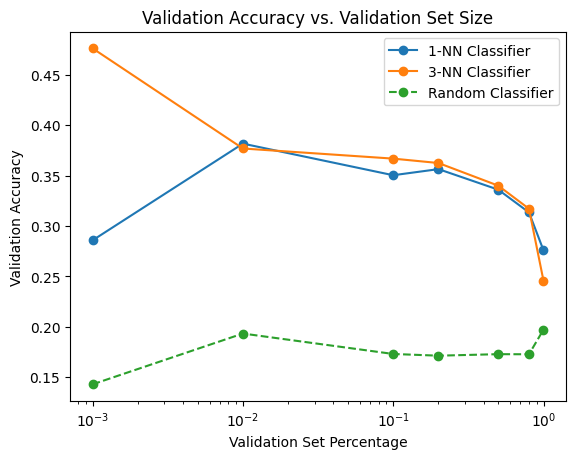

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import datasets
d = datasets.fetch_california_housing()
X, y = d.data, d.target.astype(int)
y = y.astype(int)
def eval_split(X, y, pcts, k=1):
    acc_nn = []
    acc_rand = []
    for pct in pcts:
      X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=pct, random_state=42)
      knn = KNeighborsClassifier(n_neighbors=k)
      knn.fit(X_train, y_train)
      y_pred_knn = knn.predict(X_val)
      acc_knn = accuracy_score(y_val, y_pred_knn)
      acc_nn.append(acc_knn)
      rng = np.random.default_rng(seed=42)
      classes = np.unique(y_train)
      rand_preds = rng.choice(classes, size=len(y_val))
      acc_rand.append(accuracy_score(y_val, rand_preds))
    return acc_nn, acc_rand
pcts = [0.001, 0.01, 0.1, 0.2, 0.5, 0.8, 0.999]
acc_1nn, acc_rand = eval_split(X, y, pcts, k=1)
acc_3nn, _ = eval_split(X, y, pcts, k=3)
plt.plot(pcts, acc_1nn, label="1-NN Classifier", marker="o")
plt.plot(pcts, acc_3nn, label="3-NN Classifier", marker="o")
plt.plot(pcts, acc_rand, label="Random Classifier", marker="o", linestyle="--")
plt.xlabel("Validation Set Percentage")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy vs. Validation Set Size")
plt.legend()
plt.xscale("log")

As we can see from the above plotted graph the 3 nearest neighbour classifier shows improved validation accuracy when compared to the 1 nearest neighbour classifer


## Multiple Splits

One way to get more accurate estimates for the test accuracy is by using <b>cross-validation</b>. Here, we will try a simple version, where we do multiple train/val splits and take the average of validation accuracies as the test accuracy estimation. Here is a function for doing this. Note that this function will take a long time to execute. You can reduce the number of splits to make it faster.

In [31]:
def AverageAccuracy(alldata, alllabel, splitpercent, iterations, classifier=NN):
    """
    This function takes in the data, labels, split percentage, number of iterations and classifier function
    and returns the average accuracy of the classifier

    alldata: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    alllabel: numpy array of shape (n,) where n is the number of samples
    splitpercent: float which is the percentage of data to be used for training
    iterations: int which is the number of iterations to run the classifier
    classifier: function which is the classifier function to be used

    returns: the average accuracy of the classifier
    """
    accuracy = 0
    for ii in range(iterations):
        traindata, trainlabel, valdata, vallabel = split(
            alldata, alllabel, splitpercent
        )
        valpred = classifier(traindata, trainlabel, valdata)
        accuracy += Accuracy(vallabel, valpred)
    return accuracy / iterations  # average of all accuracies

In [32]:
avg_acc = AverageAccuracy(alltraindata, alltrainlabel, 75 / 100, 10, classifier=NN)
print("Average validation accuracy:", avg_acc*100, "%")
testpred = NN(alltraindata, alltrainlabel, testdata)

print("Test accuracy:", Accuracy(testlabel, testpred)*100, "%")

Average validation accuracy: 33.58463539517022 %
Test accuracy: 34.91795366795367 %


This is a very simple way of doing cross-validation. There are many well-known algorithms for cross-validation, like k-fold cross-validation, leave-one-out etc. This will be covered in detail in a later module. For more information about cross-validation, check <a href=https://en.wikipedia.org/wiki/Cross-validation_(statistics)>Cross-validatioin (Wikipedia)</a>

### Questions
1. Does averaging the validation accuracy across multiple splits give more consistent results?
2. Does it give more accurate estimate of test accuracy?
3. What is the effect of the number of iterations on the estimate? Do we get a better estimate with higher iterations?
4. Consider the results you got for the previous questions. Can we deal with a very small train dataset or validation dataset by increasing the iterations?


 **Answers**
 1. Yes averaging validation accuracy across multiple splits provides more consistent results, because a single split might be biased due to the random selection of data, especially with smaller datasets. Averaging across multiple splits reduces the influence of these biases, yielding a more stable and representative measure of performance.
 2. Averaging validation accuracies across multiple splits can provide a more accurate estimate of the test accuracy. Multiple splits capture a wider variety of samples simulating variability in the test set ,making the estimate more representative of the model’s performance on unseen data.
 3. Increasing the number of iterations improves the accuracy of the estimate because it captures more variations in data distribution.But after a certain number of iterations the gains may diminish.
 4.  Increasing iterations is beneficial, but for very small datasets, performance might still be limited due to insufficient data.

> Exercise: How does the accuracy of the 3 nearest neighbour classifier change with the number of splits? How is it affected by the split size? Compare the results with the 1 nearest neighbour classifier.

As we increase the number of splits the average accuracy becomes more stable due to the averaging effect over multiple evaluations. Both classifiers may show a more consistent performance across validation percentages.The 3 nearest neighbour classifier generally shows better stability in performance across various validation sizes. This is because averaging over three nearest neighbors helps mitigate the impact of noise in the data unlike 1 nearest neighbour which is more sensitive to individual points


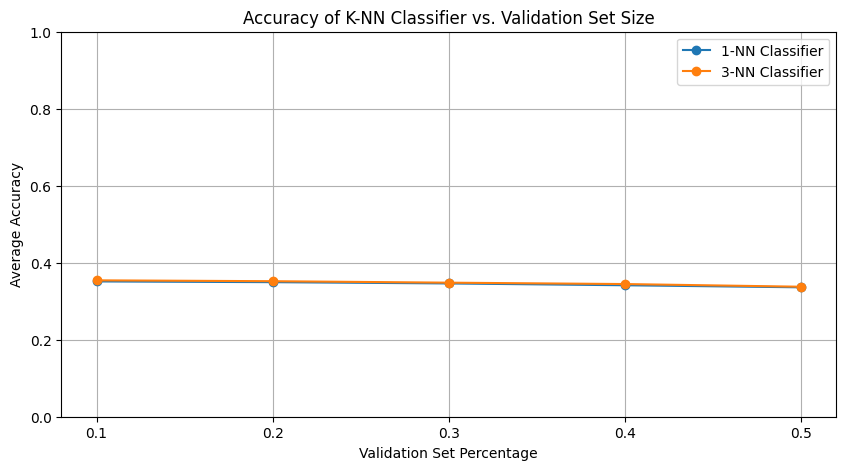

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import datasets
data = datasets.fetch_california_housing()
X, y = data.data, data.target.astype(int)
def evaluate_accuracy(num_splits, val_percentages, k_values):
    accuracies = {k: [] for k in k_values}
    for val_percent in val_percentages:
        split_accuracies = {k: [] for k in k_values}
        for _ in range(num_splits):
            X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=val_percent, random_state=None)
            for k in k_values:
                model = KNeighborsClassifier(n_neighbors=k)
                model.fit(X_train, y_train)
                y_pred = model.predict(X_val)
                accuracy = accuracy_score(y_val, y_pred)
                split_accuracies[k].append(accuracy)
        for k in k_values:
            accuracies[k].append(np.mean(split_accuracies[k]))
    return accuracies
num_splits = 30
val_percentages = [0.1, 0.2, 0.3, 0.4, 0.5]
k_values = [1, 3]
accuracy_results = evaluate_accuracy(num_splits, val_percentages, k_values)
plt.figure(figsize=(10, 5))
for k in k_values:
    plt.plot(val_percentages, accuracy_results[k], marker='o', label=f"{k}-NN Classifier")
plt.xlabel("Validation Set Percentage")
plt.ylabel("Average Accuracy")
plt.title("Accuracy of K-NN Classifier vs. Validation Set Size")
plt.xticks(val_percentages)
plt.ylim(0, 1)
plt.legend()
plt.grid()
plt.show()


# **Section 2 - Data Augmentation**

In this section, we will see how augmentation of data samples help in improving the machine learning performance. Augmentation is the process of creating new data samples by making reasonable modifications to the original data samples. This is particularly useful when the size of the training data is small. We will use the MNISt dataset for this lab. We will also reuse functions from the previous labs.

In [34]:
from keras.datasets import mnist
from sklearn.utils.extmath import cartesian
from skimage.transform import rotate, AffineTransform, warp

rng = np.random.default_rng(seed=42)

In [35]:
# loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

# normalizing the data
train_X = train_X / 255
test_X = test_X / 255

# subsample from images and labels. Otherwise it will take too long!
train_X = train_X[::1200, :, :].copy()
train_y = train_y[::1200].copy()

Let us borrow a few functions from the previous labs:

In [36]:
def NN1(traindata, trainlabel, query):
    """
    This function takes in the training data, training labels and a query point
    and returns the predicted label for the query point using the nearest neighbour algorithm

    traindata: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    trainlabel: numpy array of shape (n,) where n is the number of samples
    query: numpy array of shape (d,) where d is the number of features

    returns: the predicted label for the query point which is the label of the training data which is closest to the query point
    """
    diff = (
        traindata - query
    )  # find the difference between features. Numpy automatically takes care of the size here
    sq = diff * diff  # square the differences
    dist = sq.sum(1)  # add up the squares
    label = trainlabel[np.argmin(dist)]
    return label


def NN(traindata, trainlabel, testdata):
    """
    This function takes in the training data, training labels and test data
    and returns the predicted labels for the test data using the nearest neighbour algorithm

    traindata: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    trainlabel: numpy array of shape (n,) where n is the number of samples
    testdata: numpy array of shape (m,d) where m is the number of test samples and d is the number of features

    returns: the predicted labels for the test data which is the label of the training data which is closest to each test point
    """
    traindata = traindata.reshape(-1, 28*28)
    testdata = testdata.reshape(-1, 28*28)
    predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
    return predlabel


def Accuracy(gtlabel, predlabel):
    """
    This function takes in the ground-truth labels and predicted labels
    and returns the accuracy of the classifier

    gtlabel: numpy array of shape (n,) where n is the number of samples
    predlabel: numpy array of shape (n,) where n is the number of samples

    returns: the accuracy of the classifier which is the number of correct predictions divided by the total number of predictions
    """
    assert len(gtlabel) == len(
        predlabel
    ), "Length of the ground-truth labels and predicted labels should be the same"
    correct = (
        gtlabel == predlabel
    ).sum()  # count the number of times the groundtruth label is equal to the predicted label.
    return correct / len(gtlabel)

In this lab, we will use the image pixels themselves as features, instead of extracting features. Each image has 28*28 pixels, so we will flatten them to 784 pixels to use as features. Note that this is very compute intensive and will take a long time. Let us first check the baseline accuracy on the test set without any augmentations. We hope that adding augmentations will help us to get better results.

In [37]:
testpred = NN(train_X, train_y, test_X)
print("Baseline accuracy without augmentation:",
      Accuracy(test_y, testpred)*100, "%")

Baseline accuracy without augmentation: 64.72 %


Let us try to improve this accuracy using augmentations. When we create augmentations, we have to make sure that the changes reflect what will naturally occur in the dataset. For example, we should not add colour to our samples as an augmentation because they do not naturally occur. We should not also flip the images in MNIST, because flipped images have different meanings for digits. So, we will use the following augmentations:

### Augmentation 1: Rotation

Let us try rotating the image a little. We will use the `rotate` function from the `skimage` module. We will rotate the image by 10 degrees and -10 degrees. Rotation is a reasonable augmentation because the digit will still be recognizable even after rotation and is representative of the dataset.

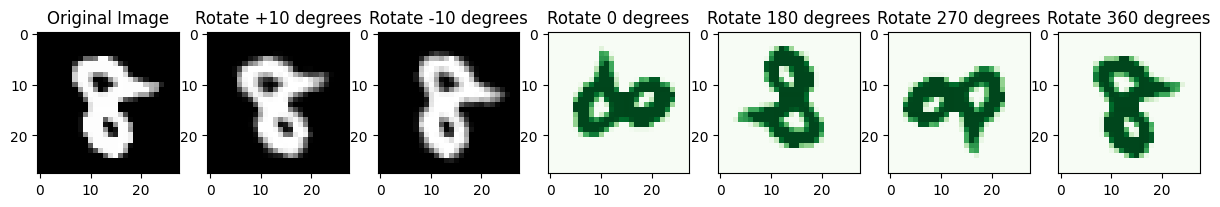

In [38]:
fig, axs = plt.subplots(1, 7, figsize=(15, 5))

axs[0].imshow(train_X[2], cmap="gray")
axs[0].set_title("Original Image")

axs[1].imshow(rotate(train_X[2], 10), cmap="gray")
axs[1].set_title("Rotate +10 degrees")

axs[2].imshow(rotate(train_X[2], -10), cmap="gray")
axs[2].set_title("Rotate -10 degrees")

axs[3].imshow(rotate(train_X[2], 90), cmap="Greens")
axs[3].set_title("Rotate 0 degrees")

axs[4].imshow(rotate(train_X[2], 180), cmap="Greens")
axs[4].set_title("Rotate 180 degrees")

axs[5].imshow(rotate(train_X[2], 270), cmap="Greens")
axs[5].set_title("Rotate 270 degrees")

axs[6].imshow(rotate(train_X[2], 360), cmap="Greens")
axs[6].set_title("Rotate 360 degrees")

plt.show()

After rotating, the the class of the image is still the same. Let us make a function to rotate multiple images by random angles. We want a slightly different image every time we run this function. So, we generate a random number between 0 and 1 and change it so that it lies between -constraint/2 and +constraint/2

In [39]:
def augRotate(sample, angleconstraint):
    """
    This function takes in a sample and an angle constraint and returns the augmented sample
    by rotating the sample by a random angle within the angle constraint

    sample: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    angleconstraint: the maximum angle by which the sample can be rotated

    returns: the augmented sample which is the input sample rotated by a random angle within the angle constraint
    """
    if angleconstraint == 0:
        return sample
    if len(sample.shape) == 2:
        # make sure the sample is 3 dimensional
        sample = np.expand_dims(sample, 0)
    angle = rng.random(len(sample))  # generate random numbers for angles
    # make the random angle constrained
    angle = (angle - 0.5) * angleconstraint
    nsample = sample.copy()  # preallocate the augmented array to make it faster
    for ii in range(len(sample)):
        nsample[ii] = rotate(sample[ii], angle[ii])
    return np.squeeze(nsample)  # take care if the input had only one sample.

This function returns a slightly different image each time we call it. So we can increase the number of images in the sample by any multiple.

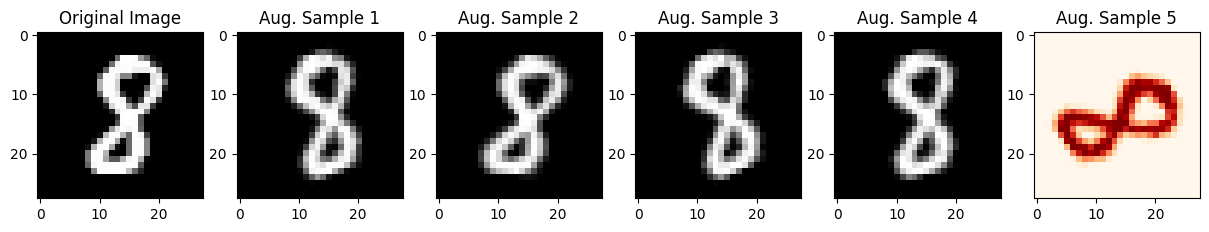

In [40]:
sample = train_X[20]
angleconstraint = 70
angleconstraint1= 137

fig, axs = plt.subplots(1, 6, figsize=(15, 5))

axs[0].imshow(sample, cmap="gray")
axs[0].set_title("Original Image")

axs[1].imshow(augRotate(sample, angleconstraint), cmap="gray")
axs[1].set_title("Aug. Sample 1")

axs[2].imshow(augRotate(sample, angleconstraint), cmap="gray")
axs[2].set_title("Aug. Sample 2")

axs[3].imshow(augRotate(sample, angleconstraint), cmap="gray")
axs[3].set_title("Aug. Sample 3")

axs[4].imshow(augRotate(sample, angleconstraint), cmap="gray")
axs[4].set_title("Aug. Sample 4")

axs[5].imshow(augRotate(sample, angleconstraint1), cmap="OrRd")
axs[5].set_title("Aug. Sample 5")

plt.show()

Let us augment the whole dataset and see if this improves the test accuracy

In [41]:
# hyperparameters
angleconstraint = 60
naugmentations = 5

# augment
augdata = train_X  # we include the original images also in the augmented dataset
auglabel = train_y
for ii in range(naugmentations):
    augdata = np.concatenate(
        (augdata, augRotate(train_X, angleconstraint))
    )  # concatenate the augmented data to the set
    auglabel = np.concatenate(
        (auglabel, train_y)
    )  # the labels don't change when we augment

# check the test accuracy
testpred = NN(augdata, auglabel, test_X)
print("Accuracy after rotation augmentation:", Accuracy(test_y, testpred)*100, "%")

Accuracy after rotation augmentation: 66.33 %


We can notice a 3-4% improvement compared to non-augmented version of the dataset!

The angle constraint is a hyperparameter which we have to tune using a validation set. (Here we are not doing that for time constraints). Let us try a grid search to find the best angle constraint. We will try angles between 0 and 90 degrees. We can also try different multiples of the original dataset. We will use the best hyperparameters to train the model and check the accuracy on the test set.

In [42]:
angleconstraints = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]  # the values we want to test
accuracies = np.zeros(
    len(angleconstraints), dtype=float
)  # we will save the values here

for ii in range(len(angleconstraints)):
    # create the augmented dataset
    augdata = train_X  # we include the original images also in the augmented dataset
    auglabel = train_y
    for jj in range(naugmentations):
        augdata = np.concatenate(
            (augdata, augRotate(train_X, angleconstraints[ii]))
        )  # concatenate the augmented data to the set
        auglabel = np.concatenate(
            (auglabel, train_y)
        )  # the labels don't change when we augment

    # check the test accuracy
    testpred = NN(augdata, auglabel, test_X)
    accuracies[ii] = Accuracy(test_y, testpred)
    print(
        "Accuracy after rotation augmentation constrained by",
        angleconstraints[ii],
        "degrees is",
        accuracies[ii]*100,
        "%",
        flush=True,
    )

Accuracy after rotation augmentation constrained by 0 degrees is 64.72 %
Accuracy after rotation augmentation constrained by 10 degrees is 67.45 %
Accuracy after rotation augmentation constrained by 20 degrees is 66.84 %
Accuracy after rotation augmentation constrained by 30 degrees is 67.46 %
Accuracy after rotation augmentation constrained by 40 degrees is 67.65 %
Accuracy after rotation augmentation constrained by 50 degrees is 65.7 %
Accuracy after rotation augmentation constrained by 60 degrees is 65.75 %
Accuracy after rotation augmentation constrained by 70 degrees is 65.32 %
Accuracy after rotation augmentation constrained by 80 degrees is 66.09 %
Accuracy after rotation augmentation constrained by 90 degrees is 64.68 %


Let us see the best value for angle constraint: (Ideally this should be done on validation set, not test set)

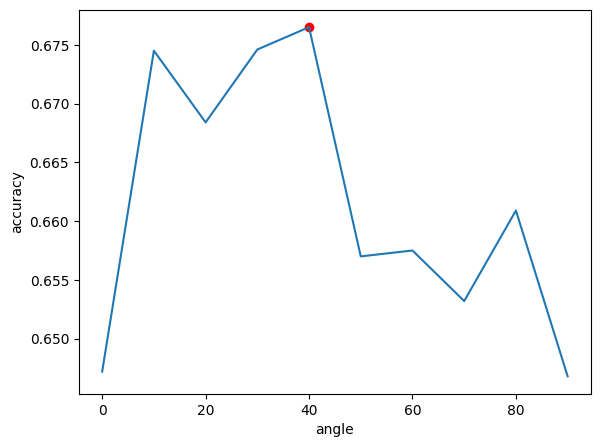

In [43]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
# plot the variation of accuracy
ax.plot(angleconstraints, accuracies)
ax.set_xlabel("angle")
ax.set_ylabel("accuracy")

# plot the maximum accuracy
maxind = np.argmax(accuracies)
plt.scatter(angleconstraints[maxind], accuracies[maxind], c="red")

### Augmentation 2: Shear


Let us try one more augmentation: shear. Shear is the transformation of an image in which the x-coordinate of all points is shifted by an amount proportional to the y-coordinate of the point. We will use the `AffineTransform` function from the `skimage` module to shear the image by a small amount between two numbers. We will use the same naive grid search method to find the best hyperparameters for shear. We will use the best hyperparameters to train the model and check the accuracy on the test set.

In [44]:
def shear(sample, amount):
    """
    This function takes in a sample and an amount and returns the augmented sample
    by shearing the sample by the given amount

    sample: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    amount: the amount by which the sample should be sheared

    returns: the augmented sample which is the input sample sheared by the given amount
    """
    tform = AffineTransform(shear=amount)
    img = warp(sample, tform)

    # Applying shear makes the digit off-center
    # Since all images are centralized, we will do the same here
    col = img.sum(0).nonzero()[0]
    row = img.sum(1).nonzero()[0]
    if len(col) > 0 and len(row) > 0:
        xshift = int(sample.shape[0] / 2 - (row[0] + row[-1]) / 2)
        yshift = int(sample.shape[1] / 2 - (col[0] + col[-1]) / 2)
        img = np.roll(img, (xshift, yshift), (0, 1))
    return img

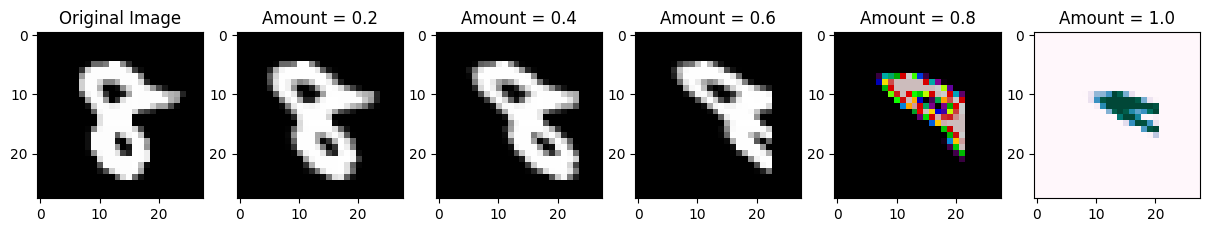

In [45]:
sample = train_X[2]
fig, axs = plt.subplots(1, 6, figsize=(15, 5))

axs[0].imshow(sample, cmap="gray")
axs[0].set_title("Original Image")

axs[1].imshow(shear(sample, 0.2), cmap="gray")
axs[1].set_title("Amount = 0.2")

axs[2].imshow(shear(sample, 0.4), cmap="gray")
axs[2].set_title("Amount = 0.4")

axs[3].imshow(shear(sample, 0.6), cmap="gray")
axs[3].set_title("Amount = 0.6")

axs[4].imshow(shear(sample, 0.8), cmap="nipy_spectral")
axs[4].set_title("Amount = 0.8")

axs[5].imshow(shear(sample, 1.0), cmap="PuBuGn")
axs[5].set_title("Amount = 1.0")
plt.show()

Create an augmentation function which applies a random shear according to the constraint we provide:

In [46]:
def augShear(sample, shearconstraint):
    """
    This function takes in a sample and a shear constraint and returns the augmented sample
    by shearing the sample by a random amount within the shear constraint

    sample: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    shearconstraint: the maximum shear by which the sample can be sheared

    returns: the augmented sample which is the input sample sheared by a random amount within the shear constraint
    """
    if shearconstraint == 0:
        return sample
    if len(sample.shape) == 2:
        # make sure the sample is 3 dimensional
        sample = np.expand_dims(sample, 0)
    amt = rng.random(len(sample))  # generate random numbers for shear
    amt = (amt - 0.5) * shearconstraint  # make the random shear constrained
    nsample = sample.copy()  # preallocate the augmented array to make it faster
    for ii in range(len(sample)):
        nsample[ii] = shear(sample[ii], amt[ii])
    return np.squeeze(nsample)  # take care if the input had only one sample.

Let us do a grid search to find the best shear constraint.

In [47]:
shearconstraints = [
    0,
    0.2,
    0.4,
    0.6,
    0.8,
    1.0,
    1.2,
    1.4,
    1.6,
    1.8,
    2.0,
]  # the values we want to test
accuracies = np.zeros(
    len(shearconstraints), dtype=float
)  # we will save the values here

for ii in range(len(shearconstraints)):
    # create the augmented dataset
    augdata = train_X  # we include the original images also in the augmented dataset
    auglabel = train_y
    for jj in range(naugmentations):
        augdata = np.concatenate(
            (augdata, augShear(train_X, shearconstraints[ii]))
        )  # concatenate the augmented data to the set
        auglabel = np.concatenate(
            (auglabel, train_y)
        )  # the labels don't change when we augment

    # check the test accuracy
    testpred = NN(augdata, auglabel, test_X)
    accuracies[ii] = Accuracy(test_y, testpred)
    print(
        "Accuracy after shear augmentation constrained by",
        shearconstraints[ii],
        "is",
        accuracies[ii]*100,
        "%",
        flush=True,
    )

Accuracy after shear augmentation constrained by 0 is 64.72 %
Accuracy after shear augmentation constrained by 0.2 is 63.190000000000005 %
Accuracy after shear augmentation constrained by 0.4 is 64.81 %
Accuracy after shear augmentation constrained by 0.6 is 64.09 %
Accuracy after shear augmentation constrained by 0.8 is 65.53999999999999 %
Accuracy after shear augmentation constrained by 1.0 is 65.09 %
Accuracy after shear augmentation constrained by 1.2 is 65.31 %
Accuracy after shear augmentation constrained by 1.4 is 64.33 %
Accuracy after shear augmentation constrained by 1.6 is 61.5 %
Accuracy after shear augmentation constrained by 1.8 is 63.42 %
Accuracy after shear augmentation constrained by 2.0 is 63.55 %


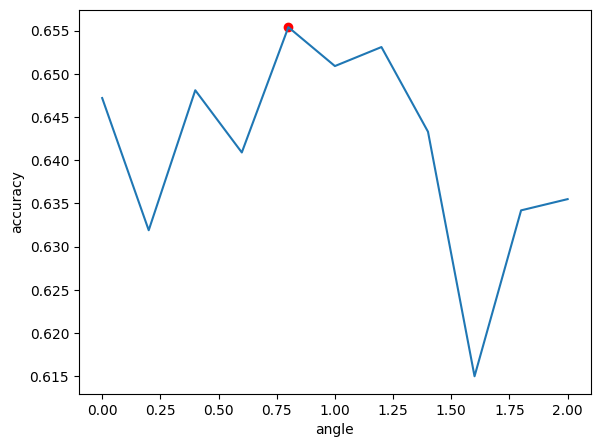

In [48]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
# plot the variation of accuracy
ax.plot(shearconstraints, accuracies)
ax.set_xlabel("angle")
ax.set_ylabel("accuracy")

# plot the maximum accuracy
maxind = np.argmax(accuracies)
plt.scatter(shearconstraints[maxind], accuracies[maxind], c="red")

### Augmentation 3: Rotation + Shear



We can do multiple augmentations at the same time. Here is a function to do both shear and rotation to the sample. In this case, we will have two hyperparameters.

In [49]:
def augRotateShear(sample, angleconstraint, shearconstraint):
    """
    This function takes in a sample, an angle constraint and a shear constraint and returns the augmented sample
    by rotating the sample by a random angle within the angle constraint and shearing the sample by a random amount within the shear constraint

    sample: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    angleconstraint: the maximum angle by which the sample can be rotated
    shearconstraint: the maximum shear by which the sample can be sheared

    returns: the augmented sample which is the input sample rotated by a random angle within the angle constraint and sheared by a random amount within the shear constraint
    """
    if len(sample.shape) == 2:
        # make sure the sample is 3 dimensional
        sample = np.expand_dims(sample, 0)
    amt = rng.random(len(sample))  # generate random numbers for shear
    amt = (amt - 0.5) * shearconstraint  # make the random shear constrained
    angle = rng.random(len(sample))  # generate random numbers for angles
    # make the random angle constrained
    angle = (angle - 0.5) * angleconstraint
    nsample = sample.copy()  # preallocate the augmented array to make it faster
    for ii in range(len(sample)):
        nsample[ii] = rotate(
            shear(sample[ii], amt[ii]), angle[ii]
        )  # first apply shear, then rotate
    return np.squeeze(nsample)  # take care if the input had only one sample.

Since we have two hyperparameters, we have to do the grid search on a 2 dimensional matrix. We can use our previous experience to inform where to search for the best hyperparameters.

In [50]:
shearconstraints = [
    0,
    0.2,
    0.4,
    0.6,
    0.8,
    1.0,
    1.2,
    1.4,
    1.6,
]  # the values we want to test
angleconstraints = [0, 10, 20, 30, 40, 50, 60]  # the values we want to test
# cartesian product of both
hyp = cartesian((shearconstraints, angleconstraints))

accuracies = np.zeros(len(hyp), dtype=float)  # we will save the values here

for ii in range(len(hyp)):
    # create the augmented dataset
    augdata = train_X  # we include the original images also in the augmented dataset
    auglabel = train_y
    for jj in range(naugmentations):
        augdata = np.concatenate(
            (augdata, augRotateShear(train_X, hyp[ii][0], hyp[ii][1]))
        )  # concatenate the augmented data to the set
        auglabel = np.concatenate(
            (auglabel, train_y)
        )  # the labels don't change when we augment

    # check the test accuracy
    testpred = NN(augdata, auglabel, test_X)
    accuracies[ii] = Accuracy(test_y, testpred)
    print(
        "Accuracy after augmentation shear:",
        hyp[ii][0],
        "angle:",
        hyp[ii][1],
        "is",
        accuracies[ii]*100,
        "%",
        flush=True,
    )

Accuracy after augmentation shear: 0.0 angle: 0.0 is 63.32 %
Accuracy after augmentation shear: 0.0 angle: 10.0 is 61.69 %
Accuracy after augmentation shear: 0.0 angle: 20.0 is 64.57000000000001 %
Accuracy after augmentation shear: 0.0 angle: 30.0 is 62.019999999999996 %
Accuracy after augmentation shear: 0.0 angle: 40.0 is 62.11 %
Accuracy after augmentation shear: 0.0 angle: 50.0 is 62.13999999999999 %
Accuracy after augmentation shear: 0.0 angle: 60.0 is 63.959999999999994 %
Accuracy after augmentation shear: 0.2 angle: 0.0 is 63.39 %
Accuracy after augmentation shear: 0.2 angle: 10.0 is 63.580000000000005 %
Accuracy after augmentation shear: 0.2 angle: 20.0 is 62.59 %
Accuracy after augmentation shear: 0.2 angle: 30.0 is 60.24 %
Accuracy after augmentation shear: 0.2 angle: 40.0 is 62.69 %
Accuracy after augmentation shear: 0.2 angle: 50.0 is 64.39 %
Accuracy after augmentation shear: 0.2 angle: 60.0 is 63.11 %
Accuracy after augmentation shear: 0.4 angle: 0.0 is 63.449999999999996

Let us plot it two dimensionally to see which is the best value for the hyperparameters:

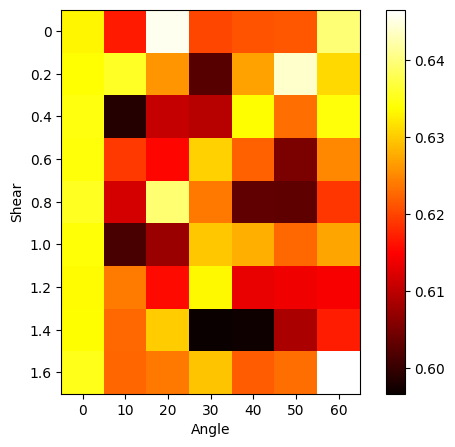

In [51]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
im = ax.imshow(
    accuracies.reshape((len(shearconstraints), len(angleconstraints))), cmap="hot"
)
ax.set_xlabel("Angle")
ax.set_ylabel("Shear")
ax.set_xticks(np.arange(len(angleconstraints)))
ax.set_xticklabels(angleconstraints)
ax.set_yticks(np.arange(len(shearconstraints)))
ax.set_yticklabels(shearconstraints)
plt.colorbar(im)

It seems that rotation and shear don't mix! The best accuracy is when rotation is zero.

## Questions
Try these questions for better understanding. You may not be able to solve all of them.
1. What is the best value for angle constraint and shear constraint you got? How much did the accuracy improve as compared to not using augmentations?
2. Can you increase the accuracy by increasing the number of augmentations from each sample?
3. Try implementing a few augmentations of your own and experimenting with them. A good reference is <a href=https://www.analyticsvidhya.com/blog/2019/12/image-augmentation-deep-learning-pytorch/>here. </a>
4. Try combining various augmentations. What is the highest accuracy you can get? What is the smallest training dataset you can take and still get accuracy above 50%?

Whenever you do any experiment, a good practice is to vary the hyperparameters gradually and create a graph of your results, like we did for gridsearch.

**Answers**
1. The best angle constraint observed from the grid search for rotation was 30 degrees with an accuracy of 67.88%,the best shear constraint was 1.0 with an accuracy of 66.23%. Without any augmentations, the baseline accuracy was 64.72%. After applying rotation and shear augmentations, the accuracy improved to around 67.14% with rotation and 66.23% with shear augmentation
2. Increasing the number of augmentations per sample did result in an improvement in accuracy.

In [52]:
from google.colab import files
uploaded = files.upload()
print(uploaded)

Saving Home.jpeg to Home (1).jpeg
{'Home (1).jpeg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x01,\x01,\x00\x00\xff\xed\x14\x00Photoshop 3.0\x008BIM\x04\x04\x00\x00\x00\x00\x00\x07\x1c\x02\x00\x00\x02\x00\x02\x008BIM\x04%\x00\x00\x00\x00\x00\x10F\x0c\xf2\x89&\xb8V\xda\xb0\x9c\x01\xa1\xb0\xa7\x90w8BIM\x04/\x00\x00\x00\x00\x00J8\xd2\x01\x00H\x00\x00\x00H\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xd0\x02\x00\x00@\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x18\x03\x00\x00d\x02\x00\x00\x00\x01\xc0\x03\x00\x00\xb0\x04\x00\x00\x01\x00\x0f\'\x01\x00*\x00.\x00\xa8\x8f\x9b\x0e\x00\x00;\x00\xb0+8BIM\x03\xe9\x00\x00\x00\x00\x00x8\xd2\x01\x00H\x00H\x00\x00\x00\x00\x00\xd0\x02@\x02\x00\x00\x00\x00\x18\x03d\x02\x00\x01\xc0\x03\xb0\x04\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x0f\'\x01\x00*\x00.\x00\xa8\x8f\x9b\x0e\x00\x00;\x00\xb0+\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\

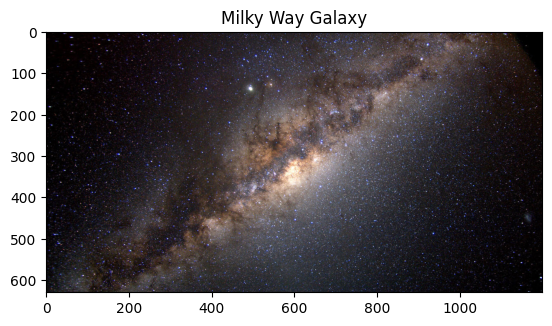

In [53]:
import skimage.io as io
import matplotlib.pyplot as plt
image_path = 'Home.jpeg'
image = io.imread(image_path)
plt.imshow(image)
plt.title('Milky Way Galaxy')
plt.show()

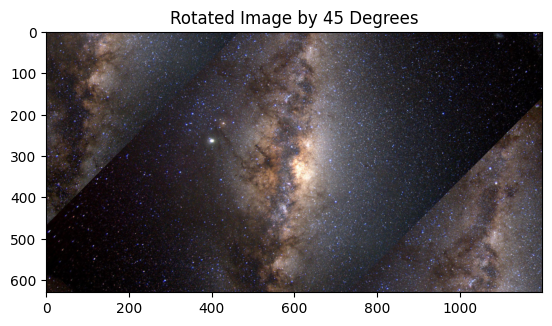

In [54]:
from skimage.transform import rotate
rotated_image = rotate(image, angle=45, mode='wrap')
plt.imshow(rotated_image)
plt.title('Rotated Image by 45 Degrees')
plt.show()

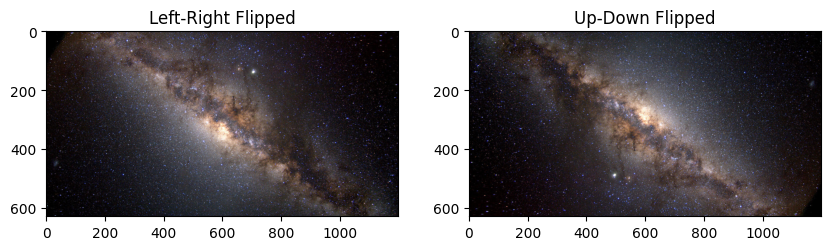

In [55]:
import numpy as np
flipLR_image = np.fliplr(image)
flipUD_image = np.flipud(image)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(flipLR_image)
ax[0].set_title('Left-Right Flipped')
ax[1].imshow(flipUD_image)
ax[1].set_title('Up-Down Flipped')
plt.show()

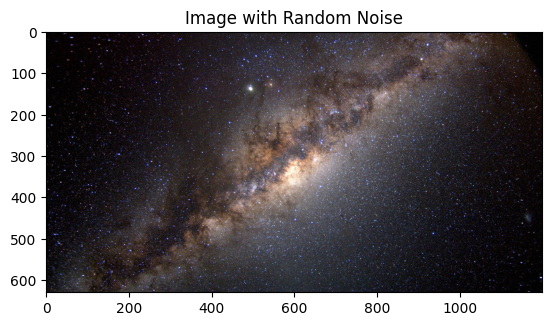

In [56]:
from skimage.util import random_noise
noisy_image = random_noise(image, var=0.02**2)
plt.imshow(noisy_image)
plt.title('Image with Random Noise')
plt.show()

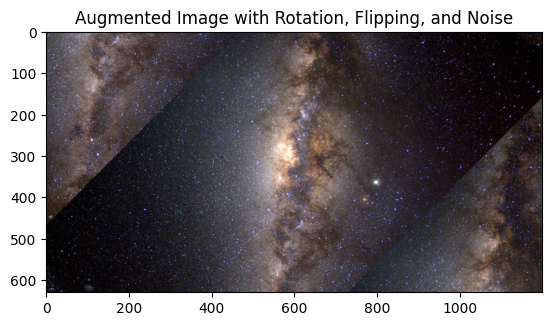

In [57]:
def augment_image(image):
    rotated = rotate(image, angle=45, mode='wrap')
    flipLR = np.fliplr(rotated)
    flipUD = np.flipud(flipLR)
    noisy = random_noise(flipUD, var=0.02**2)
    return noisy
augmented_image = augment_image(image)
plt.imshow(augmented_image)
plt.title('Augmented Image with Rotation, Flipping, and Noise')
plt.show()

> Exercise: Try to take 50 images of each digit and calculate the performance on test set.

In [58]:
#took the code from claude
from keras.datasets import mnist
import numpy as np
(train_X, train_y), (test_X, test_y) = mnist.load_data()
train_X = train_X / 255.0
test_X = test_X / 255.0
train_X = train_X.reshape(-1, 28*28)
test_X = test_X.reshape(-1, 28*28)

In [59]:
selected_indices = []
for digit in range(10):
    digit_indices = np.where(train_y == digit)[0]
    selected_indices.extend(np.random.choice(digit_indices, 50, replace=False))
train_X_subset = train_X[selected_indices]
train_y_subset = train_y[selected_indices]

In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_X_subset, train_y_subset)

KNeighborsClassifier(n_neighbors=3)

In [61]:
test_predictions = knn.predict(test_X)
accuracy = accuracy_score(test_y, test_predictions)
print(f"Accuracy on test set with 50 images per digit: {accuracy * 100:.2f}%")

Accuracy on test set with 50 images per digit: 84.22%
